In [1]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# https://stackoverflow.com/questions/17687213/how-to-obtain-the-same-font-style-size-etc-in-matplotlib-output-as-in-latex
params = {'text.usetex' : True,
          'font.size'   : 10, # the book seems to be in 10pt, change if needed
          'font.family' : 'lmodern',
          }

plt.rcParams.update(params)
default_size_inches = (3.54,3.54) 
plt.rcParams['figure.figsize'] = default_size_inches

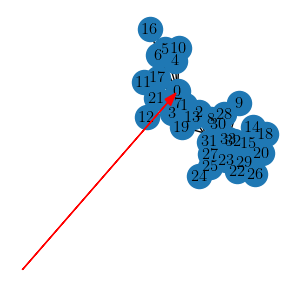

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

pos = nx.spring_layout(G)

ax = plt.axes()
nx.draw(G, pos=pos, ax=ax, with_labels=True)

x,y = pos[0]
dx = 2
dy = 2

ax.arrow(x-dx-0.02, y-dy-0.02, dx, dy,head_width=0.1, length_includes_head=True, zorder = 10, color='red' )

In [3]:
import networkx as nx
G = nx.DiGraph()
G.add_node("a", demand=-5)
G.add_node("d", demand=5)
G.add_edge("a", "b", weight=3, capacity=4)
G.add_edge("a", "c", weight=6, capacity=10)
G.add_edge("b", "d", weight=1, capacity=9)
G.add_edge("c", "d", weight=2, capacity=5)
flowDict = nx.min_cost_flow(G)
flowDict

{'a': {'b': 4, 'c': 1}, 'd': {}, 'b': {'d': 4}, 'c': {'d': 1}}

In [4]:
[ k for k in matplotlib.rcParams.keys() if 'font' in k ]

['font.cursive',
 'font.family',
 'font.fantasy',
 'font.monospace',
 'font.sans-serif',
 'font.serif',
 'font.size',
 'font.stretch',
 'font.style',
 'font.variant',
 'font.weight',
 'legend.fontsize',
 'legend.title_fontsize',
 'mathtext.fontset',
 'pdf.fonttype',
 'pdf.use14corefonts',
 'pgf.rcfonts',
 'ps.fonttype',
 'svg.fonttype']

In [5]:
import pyomo.environ as pyo
import pyomo
pyomo.__version__

'6.5.0'

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
import sys
sys.path.append('./code/')
import draw

In [8]:
# draw.SetOutputPath( 'd:/joaquimg/work/MO book/results' )
draw.SetOutputPath( './temp' )

In [9]:
graphics_type = 'svg' # or pdf

# Chapter one

In [10]:
import sympy, math, numpy as np, sys

x  = sympy.Symbol('x')

# now pi is a symbol, just like x
pi = sympy.Symbol('pi')

# we redefine h using the same right-hand-side code as before, 
# but now with x and pi as symbols
h = (pi*x**2 + 500)/(2*pi*x+50)

# to have the drivative on the symbol pi we need it from the new version of h
hprime = sympy.diff( h, x )

solution = sympy.solveset( sympy.diff( h, x ), x )
solution

{(-5*sqrt(5)*sqrt(4*pi + 5) - 25)/pi, (5*sqrt(5)*sqrt(4*pi + 5) - 25)/pi}

In [11]:
def Preety( formula ):
    from sympy import latex
    from IPython.display import display, Math
    display( Math( latex( formula ) ) )

Preety( h )
Preety( sympy.simplify( h ) )
Preety( hprime )
Preety( sympy.simplify( hprime ) )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [12]:
Preety( solution )

s = max(solution.subs( pi, math.pi ).evalf())

print(s)

<IPython.core.display.Math object>

6.95803920980307


In [13]:
def Plot( h, s=None, start=0, stop=20, width=18, height=8, file_name=None ):
    with plt.rc_context({'figure.figsize': (width,height)}): 
        plt.rcParams['figure.figsize'] = (width,height)

        plt.grid()
        plt.xlabel(r'$x$')
        plt.ylabel(r'$h(x)$')

        plt.xticks(np.arange(start, stop+1, step=1))

        x = sympy.Symbol('x')
        f = sympy.lambdify( x, h.subs( pi, math.pi ) )

        import numpy
        x = numpy.linspace(start=start,stop=stop,num=100) 
        y = f(x)

        plt.plot(x,y,label='$h(x)='+sympy.latex(h)+'$',linewidth=3)
        if s is None:
            x = numpy.linspace(start=start,stop=stop,num=stop-start+1) 
            y = f(x)
            plt.plot(x,y, 'bo', label='some points', markersize=8)
        else:
            plt.plot(s,f(s), 'ro', label='$x^*$ optimum', markersize=8)

        plt.legend()

        if file_name is not None:
            plt.savefig( draw._output_path+file_name, bbox_inches='tight', pad_inches=0 )

        plt.show()

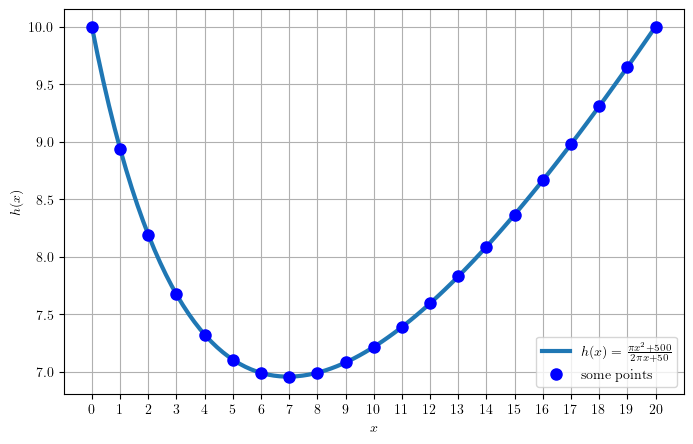

In [14]:
Plot( h, None, 0, 20, 8, 5, f'AliceSome.{graphics_type}' )

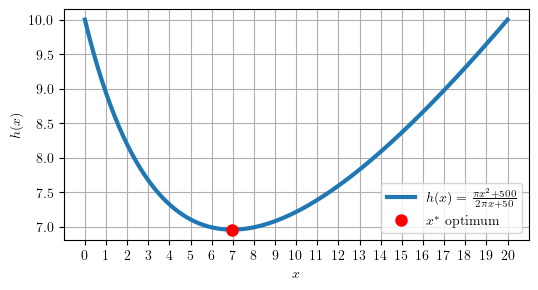

In [15]:
Plot( h, s, 0, 20, 6, 3, f'AliceOptimum.{graphics_type}' )

# Chapter two

In [16]:
def SimpleDraw( model ):
    with plt.rc_context({'figure.figsize': (8,6)}):
        return draw.Draw( model, isolines=True, file_name=f'{model.name}.{graphics_type}' )

In [17]:
def CreateBIM():
    m    = pyo.ConcreteModel('BIM')
    
    m.x1 = pyo.Var( within=pyo.NonNegativeReals )
    m.x2 = pyo.Var( within=pyo.NonNegativeReals )

    m.obj       = pyo.Objective( sense= pyo.maximize
                               , expr = 12*m.x1 + 9*m.x2 )

    m.silicon   = pyo.Constraint(expr =    m.x1          <= 1000)
    m.germanium = pyo.Constraint(expr =             m.x2 <= 1500)
    m.plastic   = pyo.Constraint(expr =    m.x1 +   m.x2 <= 1750)
    m.copper    = pyo.Constraint(expr =  4*m.x1 + 2*m.x2 <= 4800)
    
    return m

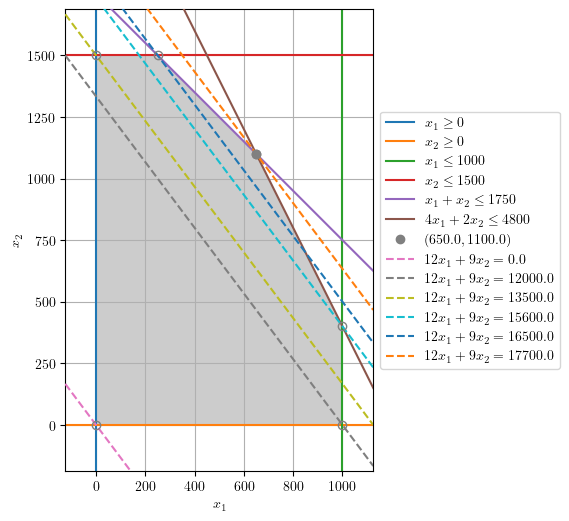

,x1,x2,value
0,0.0,0.0,0.0
1,0.0,1500.0,13500.0
4,250.0,1500.0,16500.0
5,650.0,1100.0,17700.0
2,1000.0,0.0,12000.0
3,1000.0,400.0,15600.0


In [18]:
SimpleDraw( CreateBIM() )

# Chapter three

The first version was a copy of [the model on this deck](http://web.tecnico.ulisboa.pt/mcasquilho/compute/_linpro/TaylorB_module_c.pdf]).

Below several versions of possible models.

In [19]:
def CreateBBaExample():
    model    = pyo.ConcreteModel('BBa')
    
    model.x1 = pyo.Var( within=pyo.NonNegativeReals )
    model.x2 = pyo.Var( within=pyo.NonNegativeReals )

    model.obj = pyo.Objective( sense= pyo.maximize
                                    , expr = 2*model.x1 + 3*model.x2 )

    model.c1  = pyo.Constraint(expr =  2*model.x1 +  1*model.x2 <=  10)
    model.c2  = pyo.Constraint(expr =  3*model.x1 +  6*model.x2 <=  40)
    
    return model

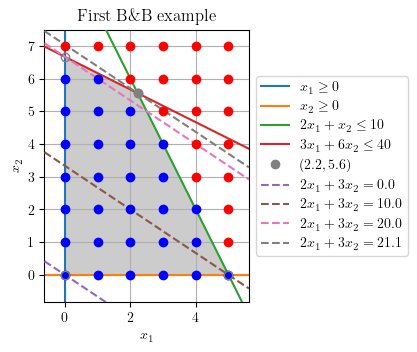

,x1,x2,value
0,0.0,0.0,0.0
1,0.0,6.7,20.0
3,2.2,5.6,21.1
2,5.0,0.0,10.0


In [20]:
draw.Draw( CreateBBaExample(), integer=True, isolines=True, file_name=f'{CreateBBaExample().name}.{graphics_type}', title='First B\&B example' )

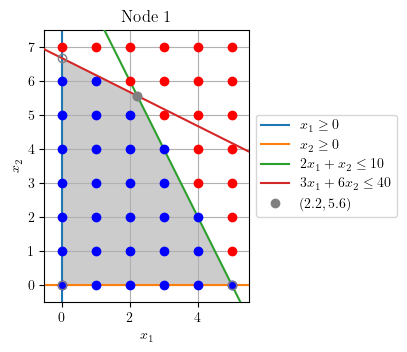

[2.22222222 5.55555556]


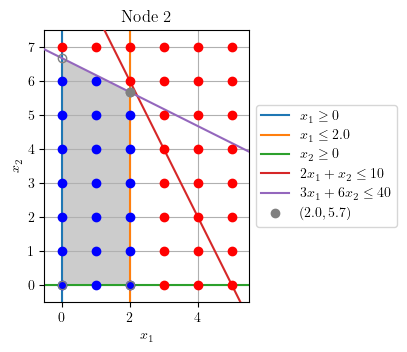

[2.         5.66666667]


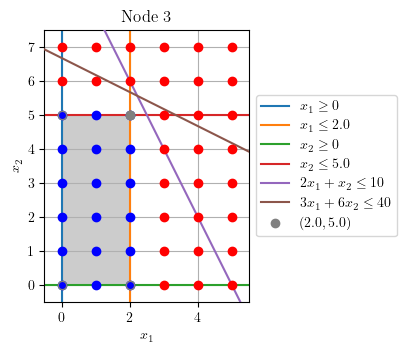

[2. 5.]


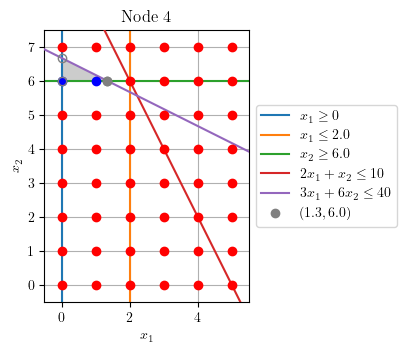

[1.33333333 6.        ]


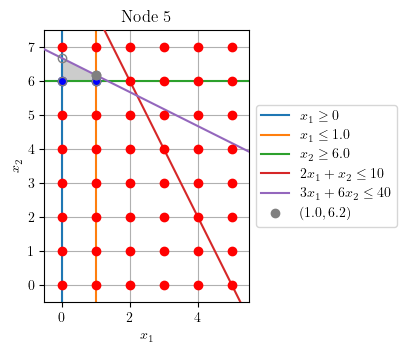

[1.         6.16666667]


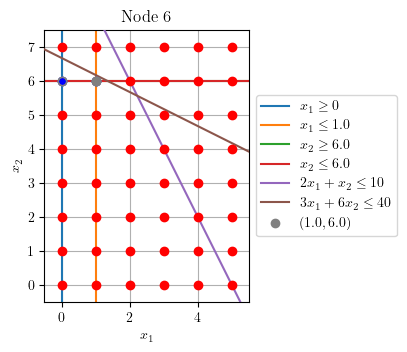

[1. 6.]
    model.name="BBa";
      - termination condition: infeasibleOrUnbounded
      - message from solver: Problem proven to be infeasible or unbounded.


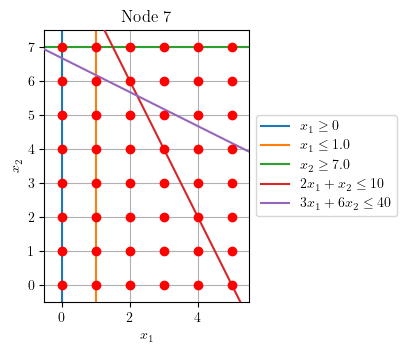

    model.name="BBa";
      - termination condition: infeasibleOrUnbounded
      - message from solver: Problem proven to be infeasible or unbounded.


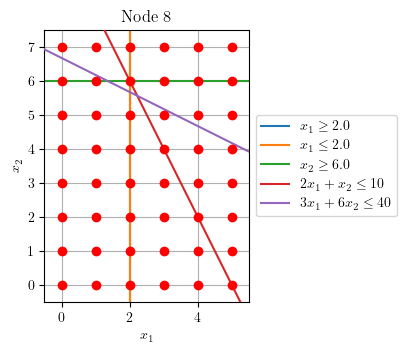

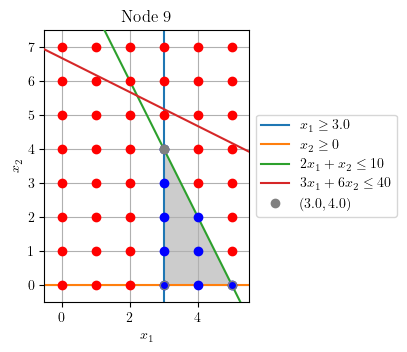

In [21]:
sol,root = draw.BB( CreateBBaExample(), solver='gurobi', graphics_format=graphics_type )

In [22]:
draw.ToTikz(root, 'BBa.tex', fig_only=True )

In [23]:
draw.DrawBB(root,f'BB.{graphics_type}')

In [24]:
draw.DotExporter(root).to_picture(f"BB.{graphics_type}")

In [25]:
def CreateBBbExample():
    m    = pyo.ConcreteModel('BBb')
    
    m.x1 = pyo.Var( within=pyo.NonNegativeReals )
    m.x2 = pyo.Var( within=pyo.NonNegativeReals )

    m.obj= pyo.Objective( sense= pyo.maximize
                        , expr =  1*m.x1 + 2*m.x2 )

    m.c1 = pyo.Constraint(expr = -4*m.x1 + 5*m.x2 <= 11)
    m.c2 = pyo.Constraint(expr =  5*m.x1 - 2*m.x2 <=  9)
    
    return m

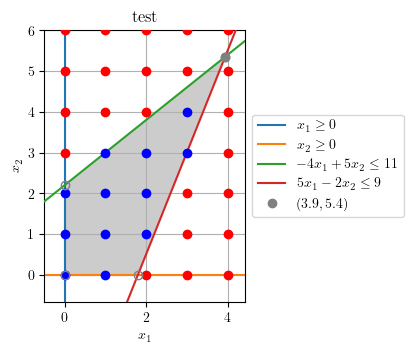

,x1,x2,value
0,0.0,0.0,0.0
1,0.0,2.2,4.4
2,1.8,0.0,1.8
3,3.9,5.4,14.6


In [26]:
draw.Draw( CreateBBbExample(), integer=True, isolines=False, file_name=None, title='test' )

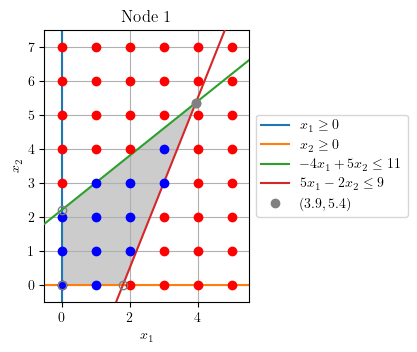

[3.94117647 5.35294118]


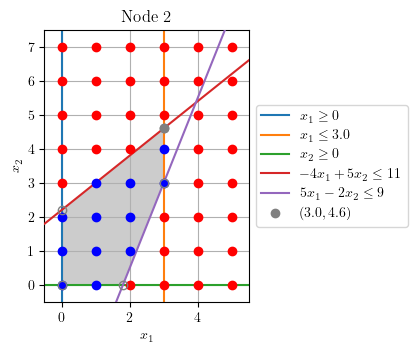

[3.  4.6]


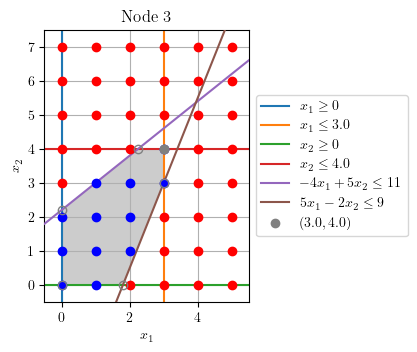

[3. 4.]
    model.name="BBb";
      - termination condition: infeasibleOrUnbounded
      - message from solver: Problem proven to be infeasible or unbounded.


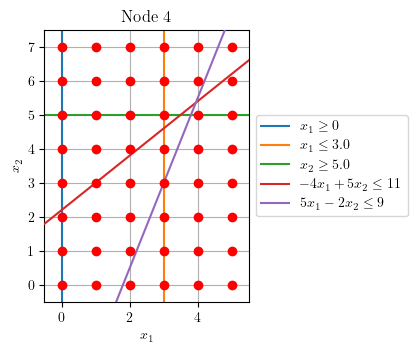

    model.name="BBb";
      - termination condition: infeasible
      - message from solver: Model was proven to be infeasible.


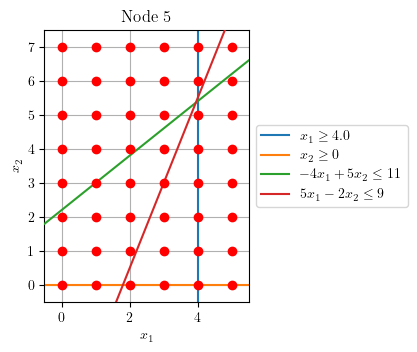

In [27]:
sol,root = draw.BB( CreateBBbExample(), solver='gurobi', graphics_format=graphics_type )

In [28]:
draw.ToTikz(root, 'BBb.tex', fig_only=True )

In [29]:
draw.DotExporter(root).to_dotfile('test.dot')

In [30]:
draw.DrawBB(root,f'BBBook.{graphics_type}')

In [31]:
def CreateBIMmodified():
    m    = pyo.ConcreteModel('BIMmodified')
    
    m.x1 = pyo.Var( within=pyo.NonNegativeReals )
    m.x2 = pyo.Var( within=pyo.NonNegativeReals )

    m.obj       = pyo.Objective( sense= pyo.maximize
                               , expr = 12*m.x1 + 9*m.x2 )

    m.silicon   = pyo.Constraint(expr =    m.x1          <= 900 )
    m.germanium = pyo.Constraint(expr =             m.x2 <= 1350)
    m.plastic   = pyo.Constraint(expr =    m.x1 +   m.x2 <= 1801)
    m.copper    = pyo.Constraint(expr =  4*m.x1 + 2*m.x2 <= 4903)
    
    return m

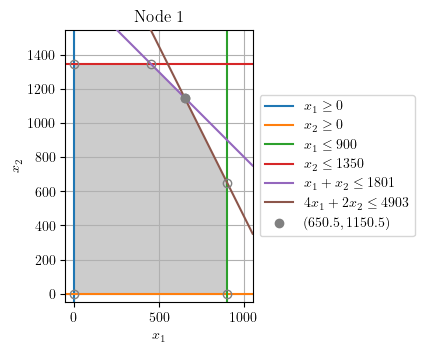

[ 650.5 1150.5]


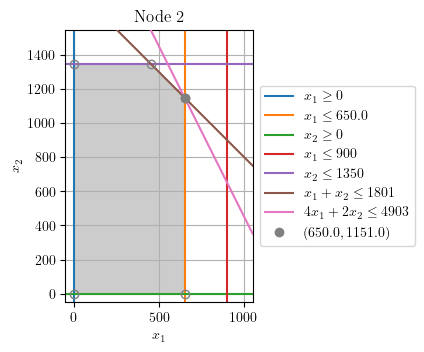

[ 650. 1151.]


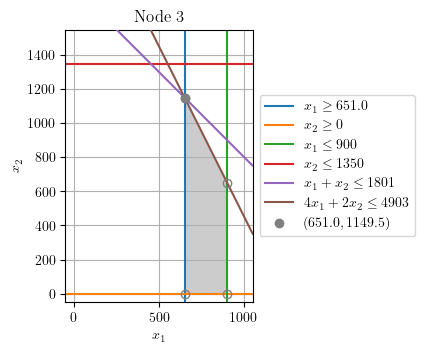

In [32]:
sol,root = draw.BB( CreateBIMmodified(), solver='gurobi', draw_integer=False, xlim=(-50,1050), ylim=(-50,1550), graphics_format=graphics_type )

In [33]:
draw.ToTikz(root, 'BIMmodified.tex', fig_only=True )

In [34]:
def CreateBIMperturbed():
    m    = pyo.ConcreteModel('BIMperturbed')
    
    m.x1 = pyo.Var( within=pyo.NonNegativeReals )
    m.x2 = pyo.Var( within=pyo.NonNegativeReals )

    m.obj       = pyo.Objective( sense= pyo.maximize
                               , expr = 12*m.x1 + 9*m.x2 )

    m.silicon   = pyo.Constraint(expr =    m.x1                <= 1000 )
    m.germanium = pyo.Constraint(expr =                   m.x2 <= 1500)
    m.plastic   = pyo.Constraint(expr =    m.x1    +      m.x2 <= 1750)
    m.copper    = pyo.Constraint(expr =  4.04*m.x1 + 2.02*m.x2 <= 4800)
    
    return m

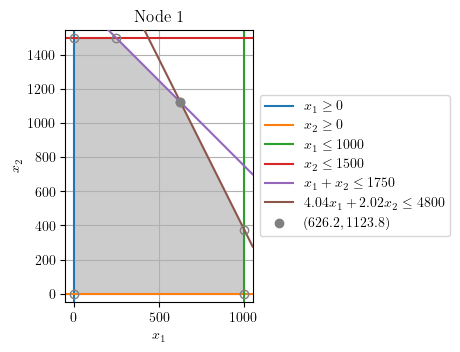

[ 626.23762376 1123.76237624]


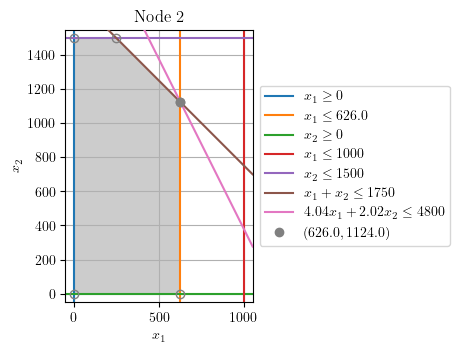

[ 626. 1124.]


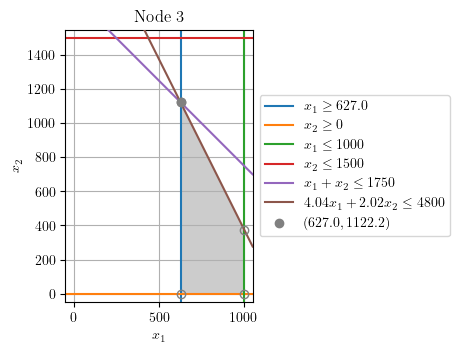

In [35]:
sol,root = draw.BB( CreateBIMperturbed(), solver='gurobi', draw_integer=False, xlim=(-50,1050), ylim=(-50,1550), graphics_format=graphics_type )

In [36]:
draw.ToTikz(root, 'BIMperturbed.tex', fig_only=True )

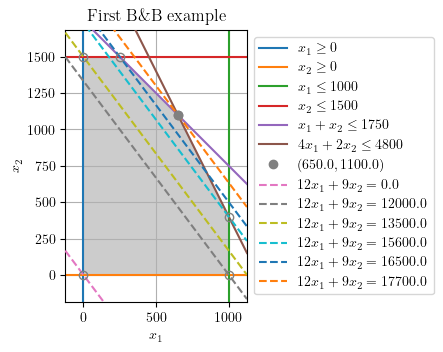

,x1,x2,value
0,0.0,0.0,0.0
1,0.0,1500.0,13500.0
4,250.0,1500.0,16500.0
5,650.0,1100.0,17700.0
2,1000.0,0.0,12000.0
3,1000.0,400.0,15600.0


In [37]:
draw.Draw( CreateBIM(), integer=False, isolines=True, file_name=None, title='First B\&B example' )

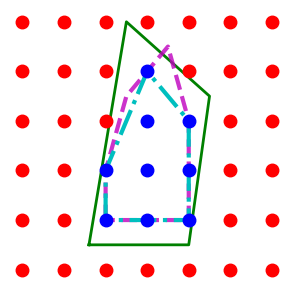

In [38]:
nx,ny = 6,5
F = { (2,1), (3,1), (4,1), (2,2), (3,2), (4,2), (3,3), (4,3), (3,4) }

import itertools  
points = list(itertools.product( range(0,nx+1), range(0,ny+1) ) )
feasible   = [ p for p in points if p in F ]
infeasible = [ p for p in points if not p in F ]
if infeasible:
    plt.plot( *zip(*infeasible), 'ro', zorder=2, markersize=9)
if feasible:
    plt.plot( *zip(*feasible), 'bo', zorder=2, markersize=9)
    
def Pol( coord, style, alpha, width ):
    coord.append(coord[0]) #repeat the first point to create a 'closed loop'
    plt.plot(*zip(*coord),style, alpha=alpha, linewidth=width, zorder=1) 

Pol( [ (1.6,.5), (2.5,5), (4.5,3.5), (4,.5) ], 'g-', 1, 2 )
Pol( [ (2,1), (2,2), (2.5, 3.5), (3.5, 4.5), (4,3), (4,1) ], 'm--', .8, 3 )
Pol( [ (2,1), (2,2), (3,4), (4,3), (4,1) ], 'c-.', 1, 3 )

ax = plt.gca()

# Hide the right and top spines
for position in ['left','right','top','bottom']:
    ax.spines[position].set_visible(False)
    
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.savefig( f'{draw._output_path}3regions.{graphics_type}', bbox_inches='tight', pad_inches=0 )
plt.show()

# Book's pictures

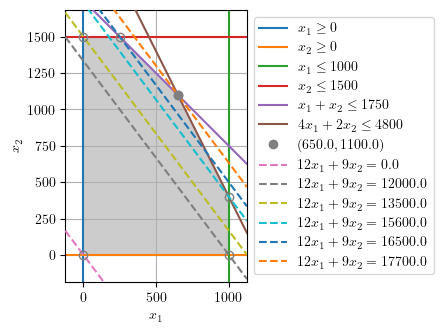

In [39]:
basicfeasiblesolutions = draw.Draw( CreateBIM(), f'BuildingMicrochips.{graphics_type}' )

In [40]:
basicfeasiblesolutions.rename(columns={'x1': '$x_1$', 'x2': '$x_2$'}).astype(int).to_latex('chips.tex')
if 'google.colab' in sys.modules:
    import os
    from google.colab import files
    files.download( 'chips.tex' )

In [41]:
basicfeasiblesolutions.rename(columns={'x1': '$x_1$', 'x2': '$x_2$'}).astype(int)

,$x_1$,$x_2$,value
0,0,0,0
1,0,1500,13500
4,250,1500,16500
5,650,1100,17700
2,1000,0,12000
3,1000,400,15600


# To do

In [42]:
class LinearModel:
    
    def __init__(self, A = np.empty([0,0]), b = np.empty([0,0]), c = np.empty([0,0]), minmax = "MAX", printIter=True):
        self.A = A
        self.b = b
        self.c = c
        self.x = [float(0)] * len(c)
        self.minmax = minmax
        self.printIter = printIter
        self.optimalValue = None
        self.transform = False
        self.history = []
        
    def addA(self, A):
        self.A = A
        self.history = []
        
    def addB(self, b):
        self.b = b
        self.history = []
        
    def addC(self, c):
        self.c = c
        self.history = []
        self.transform = False
    
    def setObj(self, minmax):
        if(minmax == "MIN" or minmax == "MAX"):
            self.minmax = minmax
        else:
            print("Invalid objective.")
        self.transform = False
        self.history = []
            
    def setPrintIter(self, printIter):
        self.printIter = printIter
            
    def printSoln(self):
        print("Coefficients: ")
        print(self.x)
        print("Optimal value: ")
        print(self.optimalValue)
        
    def printTableau(self, tableau):
        
        print("ind \t\t", end = "")
        for j in range(0, len(c)):
            print("x_" + str(j), end = "\t")
        for j in range(0, (len(tableau[0]) - len(c) - 2)):
            print("s_" + str(j), end = "\t")
        
        print()
        for j in range(0, len(tableau)):
            for i in range(0, len(tableau[0])):
                if(not np.isnan(tableau[j, i])):
                    if(i == 0):
                        print(int(tableau[j, i]), end = "\t")
                    else:
                        print(round(tableau[j, i], 2), end = "\t")
                else:
                    print(end = "\t")
            print()
            
    def getTableau(self):
        # construct starting tableau
        
        if(self.minmax == "MIN" and self.transform == False):
            self.c[0:len(c)] = -1 * self.c[0:len(c)]
            self.transform = True
        
        t1 = np.array([None, 0])
        numVar = len(self.c)
        numSlack = len(self.A)
        
        t1 = np.hstack(([None], [0], self.c, [0] * numSlack))
        
        basis = np.array([0] * numSlack)
        
        for i in range(0, len(basis)):
            basis[i] = numVar + i
        
        A = self.A
        
        if(not ((numSlack + numVar) == len(self.A[0]))):
            B = np.identity(numSlack)
            A = np.hstack((self.A, B))
            
        t2 = np.hstack((np.transpose([basis]), np.transpose([self.b]), A))
        
        tableau = np.vstack((t1, t2))
        
        tableau = np.array(tableau, dtype ='float')
        
        return tableau

    def GetSol(self,tableau):
        self.x = np.array([0] * len(c), dtype = float)
        # save coefficients
        for key in range(1, (len(tableau))):
            if(tableau[key, 0] < len(c)):
                self.x[int(tableau[key, 0])] = tableau[key, 1]
        
        self.optimalValue = -1 * tableau[0,1]      
            
    def optimize(self):
        
        if(self.minmax == "MIN" and self.transform == False):
            for i in range(len(self.c)):
                self.c[i] = -1 * self.c[i]
                transform = True
        
        tableau = self.getTableau()
         
        if(self.printIter == True):
            print("Starting Tableau:")
            self.printTableau(tableau)
        
        # assume initial basis is not optimal
        optimal = False

        # keep track of iterations for display
        iter = 1

        while(True):
            self.GetSol(tableau)
            self.history.append(self.x)
            
            if(self.printIter == True):
                print("----------------------------------")
                print("Iteration :", iter)
                self.printTableau(tableau)
                
            if(self.minmax == "MAX"):
                for profit in tableau[0, 2:]:
                    if profit > 0:
                        optimal = False
                        break
                    optimal = True
            else:
                for cost in tableau[0, 2:]:
                    if cost < 0:
                        optimal = False
                        break
                    optimal = True

            # if all directions result in decreased profit or increased cost
            if optimal == True: 
                 break
            
            # nth variable enters basis, account for tableau indexing
            if (self.minmax == "MAX"):
                n = tableau[0, 2:].tolist().index(np.amax(tableau[0, 2:])) + 2
            else:
                n = tableau[0, 2:].tolist().index(np.amin(tableau[0, 2:])) + 2

            # minimum ratio test, rth variable leaves basis 
            minimum = 99999
            r = -1

            for i in range(1, len(tableau)): 
                if(tableau[i, n] > 0):
                    val = tableau[i, 1]/tableau[i, n]
                    if val<minimum: 
                        minimum = val 
                        r = i
                            
            pivot = tableau[r, n] 
            
            print("Pivot Column:", n)
            print("Pivot Row:", r)
            print("Pivot Element: ", pivot)

            # perform row operations 
            # divide the pivot row with the pivot element 
            tableau[r, 1:] = tableau[r, 1:] / pivot 
            
            

            # pivot other rows
            for i in range(0, len(tableau)): 
                if i != r:
                    mult = tableau[i, n] / tableau[r, n]
                    tableau[i, 1:] = tableau[i, 1:] - mult * tableau[r, 1:] 


            # new basic variable 
            tableau[r, 0] = n - 2
            
            iter += 1
            
        
        if(self.printIter == True):
            print("----------------------------------")
            print("Final Tableau reached in", iter, "iterations")
            self.printTableau(tableau)
        else:
            print("Solved")
            
        self.GetSol(tableau)

In [43]:
import numpy as np

class LPCenteringSolver():
    """
    A helper module for LPSolver

    Solves LP centering problem using infeasible start Newton method:
    minimize    c'x - sum( log(x_i) )
    subject to  Ax = b

    Hyperparameters
        alpha: the factor by which we weaken the slope of first-order approximation
               in backtracking line search (0 < alpha < 0.5)
        beta: multiplicative step size in backtracking line search (0 < beta < 1)
        max_iter: maximum number of Newton steps before quitting

    Attributes
        status: 'optimal' or None
        value: optimal value of objective function
        x_opt, v_opt: primal optimal point and a dual optimal point
        num_steps: Number of Newton steps executed
        residual_norm: array of ||r(x,v)||_2 (length num_steps+1)
    """

    def __init__(self, alpha=0.25, beta=0.5, max_iter=100):
        self.alpha = alpha
        self.beta = beta
        self.max_iter = max_iter
        self.convergence_threshold = 1e-6  # stop when ||r||_2 <= convergence_threshold
        self.status = None
        self.history = []


    def solve(self, A, b, c, x0=None):
        m, n = A.shape
        self.status = None
        self.residual_norm = []
        self.history.append( [] )

        # Initialize primal and dual variables (x, v)
        x = x0 if x0 is not None else np.random.rand(n) + 0.01
        v = np.zeros(m)

        for self.num_steps in range(self.max_iter):
            self.history.append(x)
            # Compute primal and dual residuals
            r_dual = c - 1 / x + np.dot(A.T, v)
            r_primal = A.dot(x) - b
            r_norm = np.sqrt(np.sum(r_dual ** 2) + np.sum(r_primal ** 2))
            self.residual_norm.append(r_norm)

            # Convergence check
            if r_norm <= self.convergence_threshold:
                self.status = 'optimal'
                self.x_opt, self.v_opt = x, v
                self.value = np.sum(c * x) - np.sum(np.log(x))
                break

            # Compute primal and dual Newton steps (dx, dv) via block elimination
            h_inv =  x ** 2  # diagonal entries of inv(Hessian)
            dv = np.linalg.solve( np.dot(A * h_inv, A.T), r_primal - np.dot(A * h_inv, r_dual) )
            dx = -h_inv * (r_dual + np.dot(A.T, dv))

            # Backtracking line search on ||r||_2
            t = 1
            while np.min(x + t * dx) <= 0:  # prevent x from going below 0
                t = self.beta * t
            while True:
                x_new = x + t * dx
                v_new = v + t * dv
                r_dual_new = c - 1 / x_new + np.dot(A.T, v_new)
                r_primal_new = A.dot(x_new) - b
                r_norm_new = np.sqrt(np.sum(r_dual_new ** 2) + np.sum(r_primal_new ** 2))

                if r_norm_new <= (1 - self.alpha * t) * r_norm:
                    x = x_new
                    v = v_new
                    break
                else:
                    t = self.beta * t

        self.residual_norm = np.array(self.residual_norm)
        if self.status != 'optimal':
            self.num_steps = self.max_iter
            self.value, self.x_opt, self.v_opt = None, None, None


class LPSolver():
    """
    LPSolver solves the standard form LP problem:
    minimize    c'x
    subject to  Ax = b, x >= 0

    The solver uses the barrier method.
    It traverses the central path by solving a centering problem at each step:
    minimize    t * c'x - sum( log(x_i) )
    subject to  Ax = b

    The solving procedure gradually increases t after each step, and stops when
    the duality gap n / t < tol, where n is the length of x

    Hyperparameters
        mu: multiplicative step size for barrier method (t := mu * t)
        tol: suboptimality tolerance (used for convergence check)

    Attributes:
        status: 'optimal', 'infeasible', or 'failure'
        value: optimal value of objective function
        x_opt, v_opt: primal optimal point and a dual optimal point
        num_steps: number of centering steps executed
        duality_gaps: array - duality gap after every centering step
        newton_steps: array - number of Newton steps for solving centering problems
    """

    def __init__(self, mu=10, tol=1e-3) :
        self.mu = mu  # multiplicative step size for barrier method
        self.tol = tol  # maximum acceptable duality gap
        self.max_iter = 100
        self.centering_solver = LPCenteringSolver(alpha=0.25, beta=0.5, max_iter=100)

    def solve_feasible_start(self, A, b, c, x):
        """
        Solves an LP problem given a strictly feasible starting point x.
        This is used as a helper method for solving an LP problem from scratch,
        no matter whether the problem is strictly feasible or not
        """
        m, n = A.shape
        status, x_opt, v_opt, value = None, None, None, None
        duality_gaps = []  # duality gap n/t after every iteration
        newton_steps = []  # number of Newton steps for solving centering problems

        t = 1
        for num_steps in range(1, self.max_iter+1):
            # Solve LP Centering problem
            self.centering_solver.solve(A, b, t*c, x)
            if self.centering_solver.status != 'optimal':
                status = 'failure'  # Centering solver failed
                break

            x, v = self.centering_solver.x_opt, self.centering_solver.v_opt
            duality_gap = n / t
            newton_steps.append(self.centering_solver.num_steps)
            duality_gaps.append(duality_gap)

            # Convergence check
            if duality_gap < self.tol:
                status = 'optimal'
                x_opt, v_opt = x, v
                value = np.sum(c * x)
                break
            else:
                t = self.mu * t  # Increase t

        return status, x_opt, v_opt, value, num_steps, \
               np.array(duality_gaps), np.array(newton_steps)


    def solve(self, A, b, c, start=None):
        """
        Checks feasibility of an LP problem, and solves the problem if it's feasible
        The solving procedure consists of two phases:
        -- Phase I: Check strict feasibility and obtain a strictly feasible starting
                    point by using solve_feasible_start() to solve the following LP,
                    for which we can always find a feasible starting point (x, t):
                    minimize    t
                    subject to  Ax = b, x >= (1 - t) * 1_n

        -- Phase II: If strictly feasible, directly invoke solve_feasible_start()
                     with the starting point x found in Phase I
        """
        m, n = A.shape

        # Phase I: Check strict feasibility and obtain a strictly feasible starting point
        if start is None:
            x = np.linalg.pinv(A).dot(b)
        else: 
            x = np.hstack( [ start, b - np.dot(AA[:,:len(start)],start) ] )
        self.centering_solver.history.append( x )
        if np.min(x) <= 0:  # otherwise, x is already a strictly feasible point
            # Construct an LP for checking feasibility
            A1 = np.hstack(( A, -A.dot(np.ones((n, 1))) ))
            b1 = b - A.dot(np.ones(n))
            c1 = np.zeros(n+1)
            c1[-1] = 1

            t = 2 - np.min(x)  # makes sure the starting (x, t) pair is feasible
            z0 = np.concatenate(( x + (t-1)*np.ones(n), [t] ))
            status, z_opt, _, value, _, _, _ = self.solve_feasible_start(A1, b1, c1, z0)
            if status == 'optimal' and value < 1:  # strictly feasible
                x = z_opt[:n] - (z_opt[-1] - 1) * np.ones(n)
            else:
                self.status = "infeasible"
                self.x_opt, self.v_opt, self.value = None, None, None
                self.duality_gaps, self.newton_steps = None, None
                return

        # Phase II: Given a strictly feasible starting point x, solve the problem
        self.status, self.x_opt, self.v_opt, self.value, self.num_steps, \
        self.duality_gaps, self.newton_steps = self.solve_feasible_start(A, b, c, x)

In [44]:
model1 = LinearModel(printIter=False)

A = np.array([[1, 0], 
              [0, 1], 
              [1, 1],
              [4, 2]])
b = np.array([1000,1500,1750,4800])
c = np.array([12,9])

model1.addA(A)
model1.addB(b)
model1.addC(c)
model1.setObj("MAX")

print("A =\n", A, "\n")
print("b =\n", b, "\n")
print("c =\n", c, "\n\n")
model1.optimize()
print("\n")
model1.printSoln()

# Solve the problem
AA = np.hstack([A,np.eye(4)])
cc = -1*np.hstack([c,np.zeros(4)])
solver = LPSolver(mu=10, tol=1e-4)
solver.solve(AA, b, cc)
assert solver.status == 'optimal'
print("optimal value: {}".format(solver.value))

A =
 [[1 0]
 [0 1]
 [1 1]
 [4 2]] 

b =
 [1000 1500 1750 4800] 

c =
 [12  9] 


Pivot Column: 2
Pivot Row: 1
Pivot Element:  1.0
Pivot Column: 3
Pivot Row: 4
Pivot Element:  2.0
Pivot Column: 4
Pivot Row: 3
Pivot Element:  1.0
Solved


Coefficients: 
[ 650. 1100.]
Optimal value: 
17700.0
optimal value: -17699.99998


In [45]:
trajectories = { 'simplex' : model1.history,
                 'barrier' : [ x[:2] for x in solver.centering_solver.history if len(x) > 0 ]
                }

In [46]:
x = np.linalg.pinv(AA).dot(b)
x

array([730.76923077, 896.15384615, 269.23076923, 603.84615385,
       123.07692308,  84.61538462])

In [47]:
start=[0,0]

In [48]:
b - np.dot(AA[:,:2],start)

array([1000., 1500., 1750., 4800.])

In [49]:
solver.centering_solver.history

[array([730.76923077, 896.15384615, 269.23076923, 603.84615385,
        123.07692308,  84.61538462]),
 [],
 array([730.76923077, 896.15384615, 269.23076923, 603.84615385,
        123.07692308,  84.61538462]),
 array([ 676.54499704, 1012.1505172 ,  323.45500296,  487.8494828 ,
          61.30448576,   69.51897744]),
 array([ 644.72488056, 1083.70006396,  355.27511944,  416.29993604,
          21.57505548,   53.70034983]),
 array([ 642.41751692, 1096.7383582 ,  357.58248308,  403.2616418 ,
          10.84412488,   36.85321592]),
 array([ 644.80756803, 1099.77201166,  355.19243197,  400.22798834,
           5.42042031,   21.22570457]),
 array([ 647.24976883, 1099.99934963,  352.75023117,  400.00065037,
           2.75088154,   11.00222542]),
 array([ 648.58223793, 1099.99945115,  351.41776207,  400.00054885,
           1.41831092,    5.67214597]),
 array([6.49247707e+02, 1.09999947e+03, 3.50752293e+02, 4.00000532e+02,
        7.52825246e-01, 3.01023732e+00]),
 array([6.49578331e+02, 1.099

In [50]:
plt.rcParams["figure.figsize"] = (18,13)

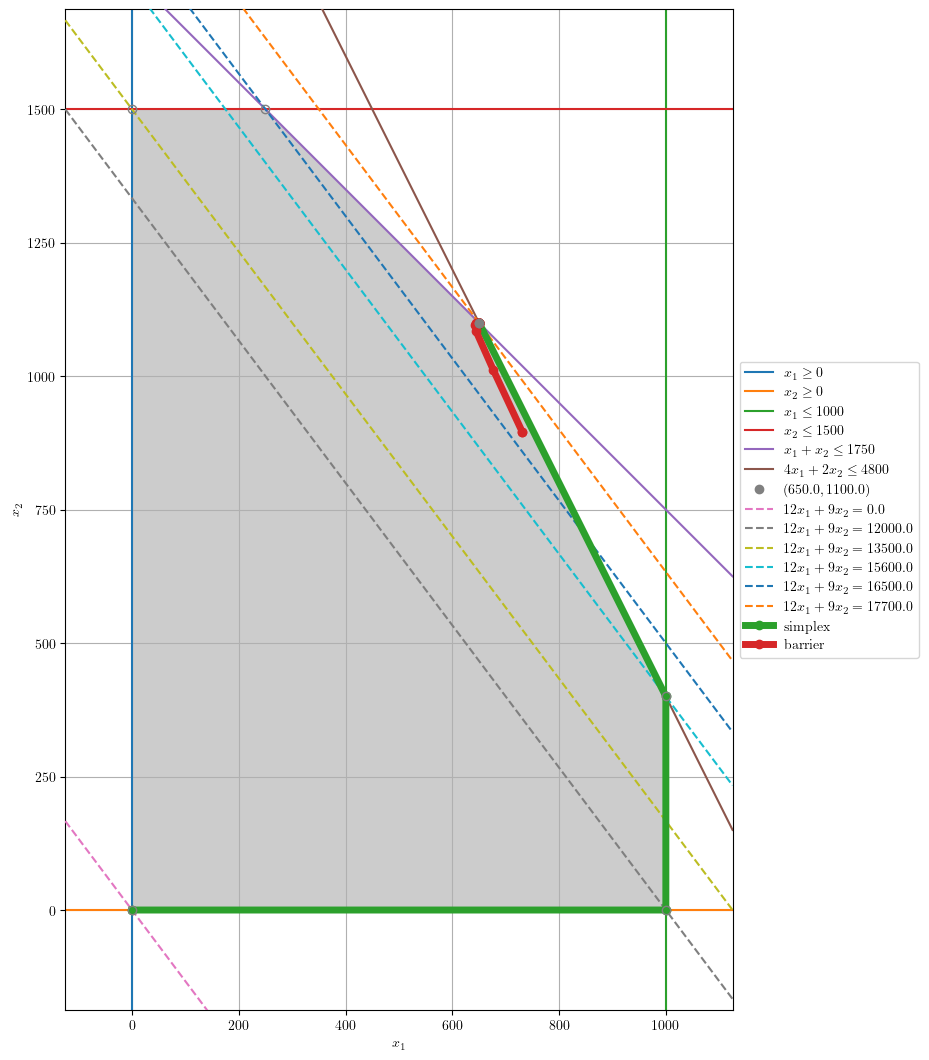

In [51]:
basicfeasiblesolutions = draw.Draw( CreateBIM(), trajectories=trajectories, file_name=f'trajectories.{graphics_type}' )

In [52]:
start=np.array(basicfeasiblesolutions.mean()[['x1','x2']])

In [53]:
solver = LPSolver(mu=10, tol=1e-4)
solver.solve(AA, b, cc, np.array([0,0]))
assert solver.status == 'optimal'
print("optimal value: {}".format(solver.value))

optimal value: -17699.99998


In [54]:
basicfeasiblesolutions.astype(int).to_excel('bfs.xlsx')

In [55]:
if 'google.colab' in sys.modules:
    from google.colab import files
    files.download( 'bfs.xlsx')

In [56]:
def AnimatedDraw( model ):
    rep       = draw.Interpret(model)
    variables = list(rep.lower_variable.keys())
    n         = len(variables)
    assert(n==2)

    plt.grid()
    plt.xlabel(r'$'+variables[0].replace('x','x_')+'$')
    plt.ylabel(r'$'+variables[1].replace('x','x_')+'$')

    A,b,c,expressions = draw.GetCanonicalMatrices( rep )
    basis = draw.GetBasicFeasibleSolutions( A, b )

    x = n*[[]]
    for i in range(n):
        min_i = min(0,min(basis[i]))
        max_i = max(0,max(basis[i]))
        delta = max_i - min_i
        x[i]  = np.linspace( min_i-delta/8, max_i+delta/8, 1000 )

    m,_ = A.shape
    for j in range(m):
        label = expressions[j].replace('*','').replace('x','x_')
        label = r'$'+label+'$'
        row = A[j,:]
        if np.count_nonzero(row) == n:
            X = (b[j]-row[0]*x[0])/row[1]
            plt.plot(x[0], X, label = label, zorder=3, alpha=1)
        else:
            assert( np.count_nonzero(row) == 1 )
            if row[0] == 0:
                plt.plot(x[0], b[j]/row[1]*np.ones_like(x[1]), label = label, zorder=2, alpha=1)
            else:
                assert( row[1] == 0 )
                plt.plot(b[j]/row[0]*np.ones_like(x[0]), x[1], label = label, zorder=2, alpha=1)

    plt.plot( basis[0], basis[1], 'o', color='gray', fillstyle='none', zorder=4 )

    if basis.size > 0:
        opt = basis[:,np.argmax(np.dot(c,basis))]
        plt.plot( opt[0], opt[1], 'o', label = r'$'+str(tuple(opt.round(1)))+'$', color='gray', zorder=5 )

    x[0],x[1] = np.meshgrid(x[0],x[1])
    borders = [ (A[j,0]*x[0]+A[j,1]*x[1] <= b[j]).astype(int) for j in range(m) ]
    image = borders[0]
    for i in range(1,len(borders)):
        image *= borders[i]
        
    plt.imshow( image
               , extent=(x[0].min(),x[0].max(),x[1].min(),x[1].max())
               , origin="lower"
               , cmap="Greys"
               , alpha = 0.2
               , zorder = 1)
    
    plt.xlim( x[0].min(),x[0].max() )
    plt.ylim( x[1].min(),x[1].max() )

    plt.show()   

    anim = None   

    return anim

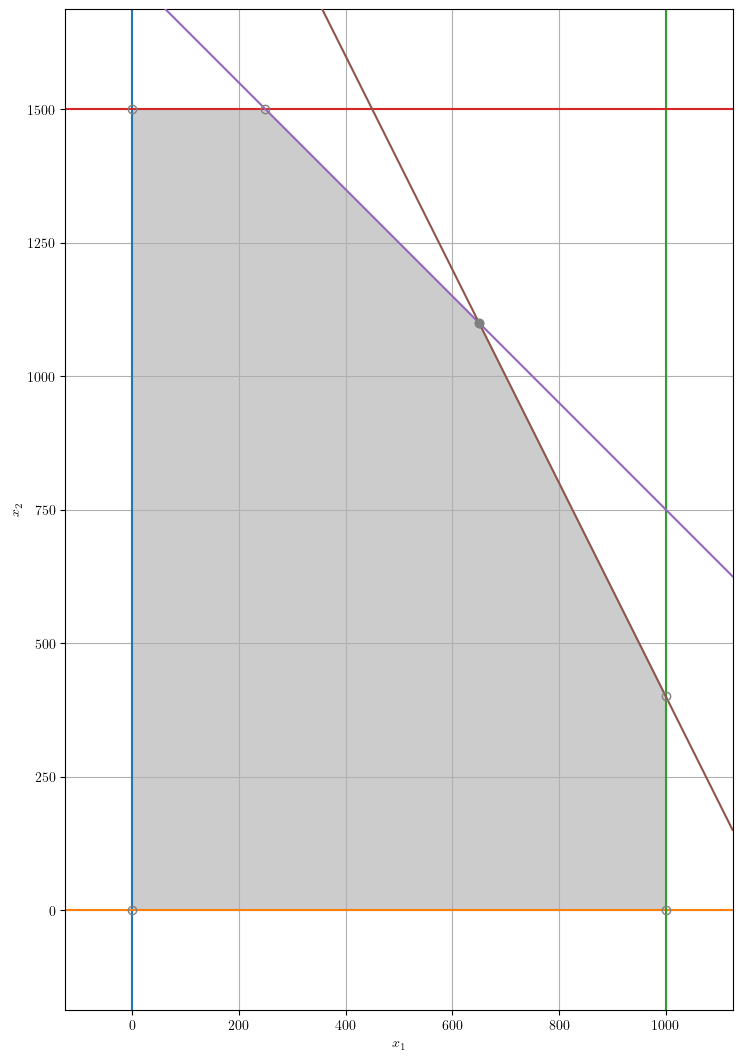

In [57]:
AnimatedDraw( CreateBIM() )

In [58]:
trajectories

{'simplex': [array([0., 0.]),
  array([1000.,    0.]),
  array([1000.,  400.]),
  array([ 650., 1100.])],
 'barrier': [array([730.76923077, 896.15384615]),
  array([730.76923077, 896.15384615]),
  array([ 676.54499704, 1012.1505172 ]),
  array([ 644.72488056, 1083.70006396]),
  array([ 642.41751692, 1096.7383582 ]),
  array([ 644.80756803, 1099.77201166]),
  array([ 647.24976883, 1099.99934963]),
  array([ 648.58223793, 1099.99945115]),
  array([ 649.24770659, 1099.99946817]),
  array([ 649.57833089, 1099.99966951]),
  array([ 649.90117242, 1099.99991347]),
  array([ 649.86097511, 1099.99988244]),
  array([ 649.837975  , 1099.99986773]),
  array([ 649.83354038, 1099.99986592]),
  array([ 649.83341568, 1099.99986592]),
  array([ 649.83341559, 1099.99986592]),
  array([ 649.83341559, 1099.99986592]),
  array([ 649.92707291, 1100.00001694]),
  array([ 649.98862046, 1099.99997773]),
  array([ 649.98501092, 1099.99998528]),
  array([ 649.98350285, 1099.99999597]),
  array([ 649.98333586, 10

In [59]:
plt.rcParams["figure.figsize"] = (6.4,4.8)

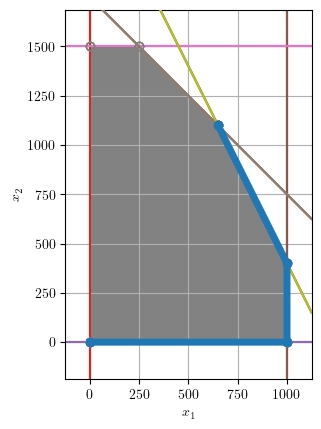

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'o-',linewidth=5,zorder=8)

model =  CreateBIM()

def init():
    rep       = draw.Interpret(model)
    variables = list(rep.lower_variable.keys())
    n         = len(variables)
    assert(n==2)

    ax.grid()
    ax.set_xlabel(r'$'+variables[0].replace('x','x_')+'$')
    ax.set_ylabel(r'$'+variables[1].replace('x','x_')+'$')

    A,b,c,expressions = draw.GetCanonicalMatrices( rep )
    basis = draw.GetBasicFeasibleSolutions( A, b )

    x = n*[[]]
    for i in range(n):
        min_i = min(0,min(basis[i]))
        max_i = max(0,max(basis[i]))
        delta = max_i - min_i
        x[i]  = np.linspace( min_i-delta/8, max_i+delta/8, 1000 )

    m,_ = A.shape
    for j in range(m):
        label = expressions[j].replace('*','').replace('x','x_')
        label = r'$'+label+'$'
        row = A[j,:]
        if np.count_nonzero(row) == n:
            X = (b[j]-row[0]*x[0])/row[1]
            ax.plot(x[0], X, label = label, zorder=3, alpha=1)
        else:
            assert( np.count_nonzero(row) == 1 )
            if row[0] == 0:
                ax.plot(x[0], b[j]/row[1]*np.ones_like(x[1]), label = label, zorder=2, alpha=1)
            else:
                assert( row[1] == 0 )
                ax.plot(b[j]/row[0]*np.ones_like(x[0]), x[1], label = label, zorder=2, alpha=1)

    ax.plot( basis[0], basis[1], 'o', color='gray', fillstyle='none', zorder=4 )

    if basis.size > 0:
        opt = basis[:,np.argmax(np.dot(c,basis))]
        ax.plot( opt[0], opt[1], 'o', label = r'$'+str(tuple(opt.round(1)))+'$', color='gray', zorder=5 )

    x[0],x[1] = np.meshgrid(x[0],x[1])
    borders = [ (A[j,0]*x[0]+A[j,1]*x[1] <= b[j]).astype(int) for j in range(m) ]
    image = borders[0]
    for i in range(1,len(borders)):
        image *= borders[i]
        
    ax.imshow( image
               , extent=(x[0].min(),x[0].max(),x[1].min(),x[1].max())
               , origin="lower"
               , cmap="Greys"
               , alpha = 0.2
               , zorder = 1)
    
    ax.set_xlim( x[0].min(),x[0].max() )
    ax.set_ylim( x[1].min(),x[1].max() )

    ln.set_data([], [])
    return ln,

def update(frame):
    xdata.append(frame[0])
    ydata.append(frame[1])
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=trajectories['simplex'],
                    init_func=init, blit=True)
ani.save('simplex.gif', dpi=200, writer='imagemagick')

ani

In [61]:
from matplotlib import rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

ani